In [3]:
!pip install fastparquet

     |████████████████████████████████| 28.6MB 128kB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
  Created wheel for fastparquet: filename=fastparquet-0.4.1-cp36-cp36m-linux_x86_64.whl size=7125484 sha256=b8a312ce106436621210650987cff0f6862e903efd24c7f76599f707f7197a31
  Stored in directory: /root/.cache/pip/wheels/10/45/cf/492ccb908adde1dd2551bb509a56e4096cce9487167f525120
  Created wheel for thrift: filename=thrift-0.13.0-cp36-cp36m-linux_x86_64.whl size=345241 sha256=375fe51a2eeae048fba4c1e2ad0b271fcd154fe7d6964ca61681549f9b77a321
  Stored in directory: /root/.cache/pip/wheels/02/a2/46/689ccfcf40155c23edc7cdbd9de488611c8fdf49ff34b1706e
Successfully built fastparquet thrift


In [4]:
% matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import pyarrow as pa   
import pyarrow.parquet as pq
from fastparquet import ParquetFile
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob, Word
from sklearn.externals import joblib
import json
import gzip

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
def parse(path):
    g = gzip.open('/content/drive/My Drive/Data_Mining_Project/Luxury Beauty/Luxury_Beauty_5.json.gz', 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Luxury_Beauty_5.json.gz')

### Data Insight/Sentiment Analysis BELOW:

In [7]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


In [8]:
#describe the overall rating

df.overall.describe()

count    34278.00000
mean         4.28616
std          1.03736
min          1.00000
25%          4.00000
50%          5.00000
75%          5.00000
max          5.00000
Name: overall, dtype: float64

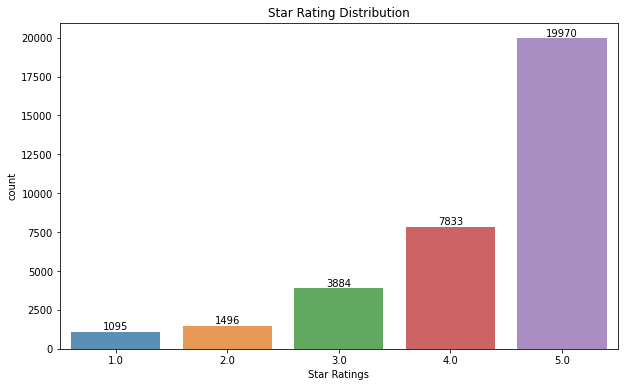

In [9]:
x=df['overall'].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('count')
plt.xlabel('Star Ratings')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [10]:
df.overall.value_counts()

5.0    19970
4.0     7833
3.0     3884
2.0     1496
1.0     1095
Name: overall, dtype: int64

In [11]:
#adding year column
df['Year'] = (np.where(df['reviewTime'].str.contains(','),
                  df['reviewTime'].str.split(',').str[1],
                  df['reviewTime']))

In [12]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Year
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN,2018
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN,2017
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN,2017
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN,2017
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN,2017


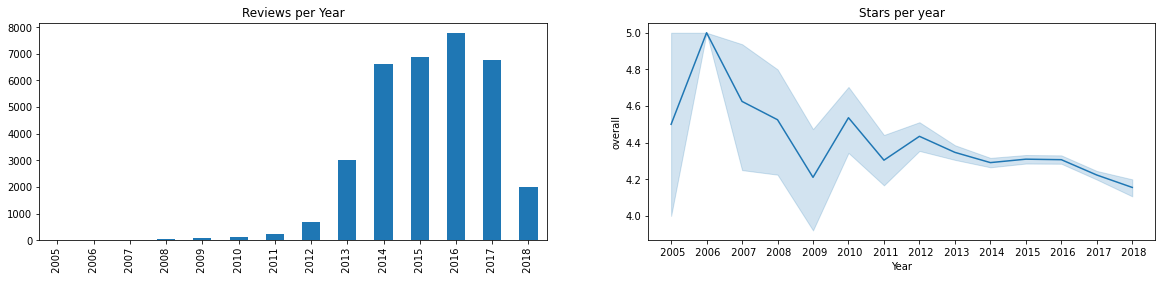

In [13]:
#getting reviews per year and stars per year

fig, axes = plt.subplots(ncols=2, figsize=(20, 4))
df.Year.value_counts().sort_index().plot.bar(title='Reviews per Year', ax=axes[0]);
chart = sns.lineplot(x='Year', y='overall', data=df, ax=axes[1])
axes[1].set_title('Stars per year');
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [14]:
df.Year.value_counts()

 2016    7775
 2015    6900
 2017    6752
 2014    6630
 2013    3004
 2018    2014
 2012     702
 2011     240
 2010     125
 2009      76
 2008      40
 2007      16
 2005       2
 2006       2
Name: Year, dtype: int64

In [15]:
#Check one sample review
review_sample = df.reviewText.sample(1).iloc[0]
print(review_sample)


have used many different types of foundation over the years, I will say that is different from any other that I have used.
The product itself is a different consistency than other foundations.  This is almost like a heavy dense face cream, but a little bit more waxy than creamy.
I like light coverage on my foundation, so I did not use a ton of the product to cover my face.  I'm sure that if you prefer a heavier coverage that this product could do that as well.
I did read the directions, scooped a little bit of the product out with the provided spatula and made sure to warm the product up before applying-I did this on the back of my hand.  I applied the product with my fingers and liked that as I could control where and how much coverage I wanted.
I like this foundation and appreciate that it has an SPF 30 built into it.  It didn't feel heavy or drying and left my face feeling nice and smooth.  I would recommend this product for those that don't mind applying their foundation with their

In [16]:
#using textblob to understand the sentiment score: The review below has a polarity of about .23, 
#meaning it is positive, and a subjectivity of about 0.30, meaning it is fairly subjective.

TextBlob(review_sample).sentiment

Sentiment(polarity=0.15572916666666667, subjectivity=0.5094907407407407)

### sample 33000 reviews from our data and adding a new column named polarity.



In [17]:
df['reviewText'] = df['reviewText'].astype(str)

In [35]:
#sample 33000

sample_reviews = df[['overall', 'reviewText']].sample(34000)


In [23]:
pd.set_option('max_colwidth', 400)


In [36]:
sample_reviews.head()

,overall,reviewText
7810,5.0,Love the texture and quality of this product in providing moisture to your skin care regimen. I am a 57 and find that as I get older my skin needs more moisture and this product does the job. This is the second purchase as I first bought it from my esthetician for $62 and found it online for $33 which included shipping.
25011,3.0,"The review addresses the packaging, delivery system, the results, and the price (for what the consumer receives).\n\nForemost, the packaging strives to impress the consumer. The cardboard box, while entirely unnecessary, insinuates that this is a luxury item and requires additional protection (hence a box for a plastic bottle of conditioner). The (relatively small) tube is ombre and thus trend..."
30796,5.0,"Bliss radiance restoring mist is a fantastic moisturizer for use anytime. My skin tends to dry out due to a thyroid condition. I've found that using bliss helps me look the best I can be, day and night.\n\nBliss features vitamin C which is proven to be beneficial for skin health. Other useful ingredients include soy protein, wheat protein, cranberry fruit extract and ginseng. I simply couldn't..."
7268,5.0,"I was introduced to this product on a cruise 3 years ago and have used it ever since! This is a very high quality product, excellent for sensitive skin."
5202,4.0,"I have been using the Juice Green Apple Peel for 5 or more years and I swear by it - If you have sensitive, acne-prone and rosacea-prone skin this peel is wonderful. The Clear Skin kit is perfect for sampling other Juice products or having travel sized products. I am equally in love with the cleanser finding it gentle yet treating. I am not impressed with the moisturizer, it feels a bit sti..."


In [37]:
def detect_polarity(reviewText):
    return TextBlob(reviewText).sentiment.polarity

In [38]:
sample_reviews['polarity'] = sample_reviews.reviewText.apply(detect_polarity)
sample_reviews.head()

#was expecting the polarity to be in line with the stars (run again)

,overall,reviewText,polarity
7810,5.0,Love the texture and quality of this product in providing moisture to your skin care regimen. I am a 57 and find that as I get older my skin needs more moisture and this product does the job. This is the second purchase as I first bought it from my esthetician for $62 and found it online for $33 which included shipping.,0.283333
25011,3.0,"The review addresses the packaging, delivery system, the results, and the price (for what the consumer receives).\n\nForemost, the packaging strives to impress the consumer. The cardboard box, while entirely unnecessary, insinuates that this is a luxury item and requires additional protection (hence a box for a plastic bottle of conditioner). The (relatively small) tube is ombre and thus trend...",0.117210
30796,5.0,"Bliss radiance restoring mist is a fantastic moisturizer for use anytime. My skin tends to dry out due to a thyroid condition. I've found that using bliss helps me look the best I can be, day and night.\n\nBliss features vitamin C which is proven to be beneficial for skin health. Other useful ingredients include soy protein, wheat protein, cranberry fruit extract and ginseng. I simply couldn't...",0.254333
7268,5.0,"I was introduced to this product on a cruise 3 years ago and have used it ever since! This is a very high quality product, excellent for sensitive skin.",0.436000
5202,4.0,"I have been using the Juice Green Apple Peel for 5 or more years and I swear by it - If you have sensitive, acne-prone and rosacea-prone skin this peel is wonderful. The Clear Skin kit is perfect for sampling other Juice products or having travel sized products. I am equally in love with the cleanser finding it gentle yet treating. I am not impressed with the moisturizer, it feels a bit sti...",0.193304


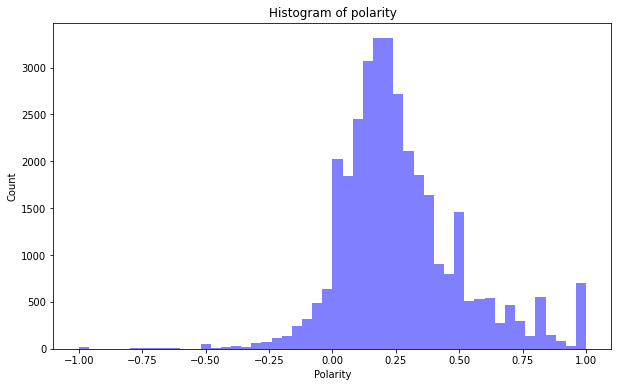

In [39]:

# A histogram of the polarity scores.
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_reviews.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

#most polarity scores are above 0, so most of them are positive sentiment

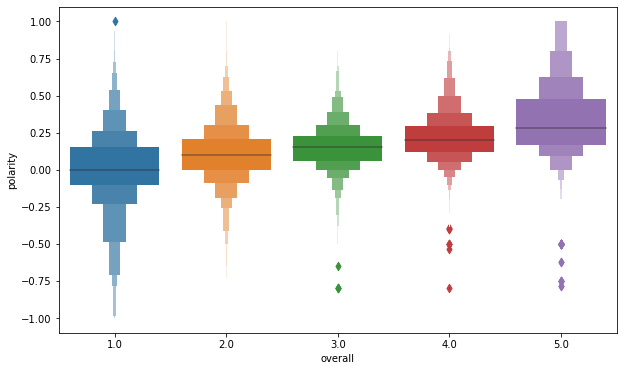

In [40]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='overall', y='polarity', data=sample_reviews)
plt.show();

#We can see a linear relationship between the star rating and the polarity

## Find OUTLIERS Next

In [41]:
#looking at reviews with lower polarity
sample_reviews[sample_reviews.polarity == -1].head(15)

,overall,reviewText,polarity
10078,2.0,not for me. break me out so bad!!!!,-1.0
19019,2.0,Works well but smells terrible.,-1.0
1658,1.0,"Don't order, awful, hooky, threw it out as it could not be replaced",-1.0
32292,1.0,This product caused the skin around my eyes to break out terribly...,-1.0
7509,2.0,not for me. break me out so bad!!!!,-1.0
4668,1.0,The smell is awful!,-1.0
4072,1.0,It's meant to help make my hair lustrous but I can't put this on because IT SMELLS SO BAD! Just yuck !,-1.0
1672,1.0,"Don't order, awful, hooky, threw it out as it could not be replaced",-1.0
8087,1.0,Awful color!!,-1.0
5518,1.0,Awful color!!,-1.0


In [42]:
#find reviews with lowest rating 

sample_reviews[(sample_reviews.overall == 1)].head(10)

,overall,reviewText,polarity
18827,1.0,This is not the real thing. It's fake and a horrible one at that. If I could put zero stars I would. So disappointed.,-0.512500
31473,1.0,This hairspray reeks terribly of cheap cologne scent. I don't think I'll be attracting any women with it either. It's terribly overpowering. So bad I had to actually jump back into the shower to wash it off. I only used two short sprays and it stunk up the entire bathroom.\n\nI've had functionally bad hairspray but I would gladly use those over this one. I would not use this hairspray under ...,0.053782
4460,1.0,"This is absolutely terrible smelling. It's a combination of old lady and very old, sickly-sweet perfume smell-- not at all like the other crabtree & evelyn products I've had over the years. A cute box and bottle don't make up for the odor.\n\nI sprayed it on a jacket and have had to wash the jacket to get rid of the horrible smell.",-0.232500
1319,1.0,Doesnt work,0.000000
282,1.0,"I had such high hopes for OPI's Infinite Shine, but it is just not a good product. I ordered the primer and top coat, plus two colors--You Can Count on It and Can't Be Beet!. The consistency of the pink, You Can Count on It, was awful--streaky and gloppy; it left brush marks that refused to smooth out after application. I let the first coat dry very well before applying the second coat, but...",0.052063
2194,1.0,"I really loved the color, and that's why I gave it one star. After I put the polish on, it was bubbly, it was very thick to put on, like polish does when it gets older, really disappointed since this was my first Essie polish purchase.",-0.004667
20784,1.0,I got this serum from vichy website am using it for already a month and got 0 difference,0.000000
5228,1.0,"Generally speaking, I love this line but this product should not be called a scrub it. It should not even be sold. The sporadic sharp grains of almonds are very abrasive and my skin can take almost any scrub. In fact I rarely find an affective scrub. This so-called scrub however is ineffectual in every way. Baking soda delivers way more value.",0.237500
12610,1.0,I have had nothing but problems with this polish. It's streaky no matter how many coats or how much Seche top coat I use. It's super pretty and makes me sad that the formula is so crappy.,0.213889
14380,1.0,I am in my 30's and this product is causing me to break out with pimples. I though I was done with all that. Anything else I use seems to keep my face pimple free. Staying away from this as much as possible.,0.200000


In [44]:
#reviews that have high rating but negative sentiment

sample_reviews[(sample_reviews.overall == 5) & (sample_reviews.polarity < 0)].head()

,overall,reviewText,polarity
13043,5.0,Very expensive but I am a believer. Helps generate collagen on my face and under eye area. I think it is worth every penny.,-0.175000
32374,5.0,Expensive but worth every penny,-0.100000
16017,5.0,"I really like this face wash, because I like to use a facial wash that has suds and isn't drying. This product provides both for me. I'm not sure if my face is ""brighter"", but I will continue to use it!",-0.037500
7900,5.0,"Repeat buyer of this stuff - I was skeptical at first, but this stuff really helps with preventing ingrown hairs after shaving.",-0.016667
16153,5.0,"I like this color very much. The product does last almost 2 weeks for me, but I am very hard on polish.",-0.039722


In [46]:
#reviews that have LOW rating but most positive polarity

sample_reviews[(sample_reviews.overall == 1) & (sample_reviews.polarity >= .5)].head(15)

,overall,reviewText,polarity
1914,1.0,Extremely light!,0.500000
2291,1.0,"I love this color (and many of Essie's colors), but the polish gets so many bubbles as it dries that it's unusable.",0.500000
6464,1.0,Great product.,0.800000
7005,1.0,love Mario Badescu products but this one made me break out!,0.625000
22789,1.0,Extremely light!,0.500000
12340,1.0,Very cheap nail polish. It chips very easily.,0.541667
10136,1.0,0 effect on acnes. The stage of acne does not matter... like i did not applied anything. Origin acne spot remover is 10 times better than this one.,0.500000
18570,1.0,Extremely light!,0.500000
19814,1.0,"I love this color (and many of Essie's colors), but the polish gets so many bubbles as it dries that it's unusable.",0.500000
21228,1.0,"I love this color (and many of Essie's colors), but the polish gets so many bubbles as it dries that it's unusable.",0.500000
